In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import homogeneity_score
from xgboost import XGBRegressor
from sklearn import svm

In [3]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Superstore 2023.csv')

In [4]:
# Step 1: Data exploration
print(df.shape)

(9994, 21)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [5]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9983.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55245.233297    229.858001     3.789574     0.156203   
std    2885.163629  32038.715955    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  57103.000000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [6]:
## first two rows of the sales column

print(df.head(2))

   Row ID        Order ID           Order Date   Ship Date     Ship Mode  \
0       1  CA-2020-152156  08/11/2022 00:00:00  11/11/2020  Second Class   
1       2  CA-2020-152156  08/11/2022 00:00:00  11/11/2020  Second Class   

  Customer ID Customer Name   Segment Country/Region       City  ...  \
0    CG-12520   Claire Gute  Consumer  United States  Henderson  ...   
1    CG-12520   Claire Gute  Consumer  United States  Henderson  ...   

  Postal Code  Region       Product ID   Category Sub-Category  \
0     42420.0   South  FUR-BO-10001798  Furniture    Bookcases   
1     42420.0   South  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  

[2 rows x 21 columns]


In [7]:
# Dropping non-numeric columns from the DataFrame
df1 = df.drop(columns=["Row ID", "Order ID", "Order Date", "Ship Date", "Ship Mode",
                       "Customer ID", "Customer Name", "Segment", "Country/Region", 
                       "City", "State", "Postal Code", "Region", "Product ID", 
                       "Category", "Sub-Category", "Product Name"])

# Getting statistical descriptions using scipy's describe function
df_description = pd.DataFrame(describe(df1),
                              index=["nobs", "minmax", "mean", "variance", "skewness", "kurtosis"])

# Display the statistical description
df_description


,0
nobs,9994
minmax,"([0.444, 1.0, 0.0, -6599.978], [22638.48, 14.0..."
mean,"[229.85800083049833, 3.789573744246548, 0.1562..."
variance,"[388434.4553080756, 4.951113137611377, 0.04262..."
skewness,"[12.970805179533526, 1.2783528478702606, 1.684..."
kurtosis,"[305.15842681749734, 1.9902926633130011, 2.407..."


In [8]:
## checking the tail of the dataset

df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2018-110422,21/01/2020 00:00:00,23/01/2018,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2021-121258,26/02/2023 00:00:00,03/03/2021,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2021-121258,26/02/2023 00:00:00,03/03/2021,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2021-121258,26/02/2023 00:00:00,03/03/2021,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2021-119914,04/05/2023 00:00:00,09/05/2021,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [9]:
# Step 2: Data Cleaning
## Checking for missing values
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [10]:
## Checking for Duplicates
df.duplicated().sum()

0

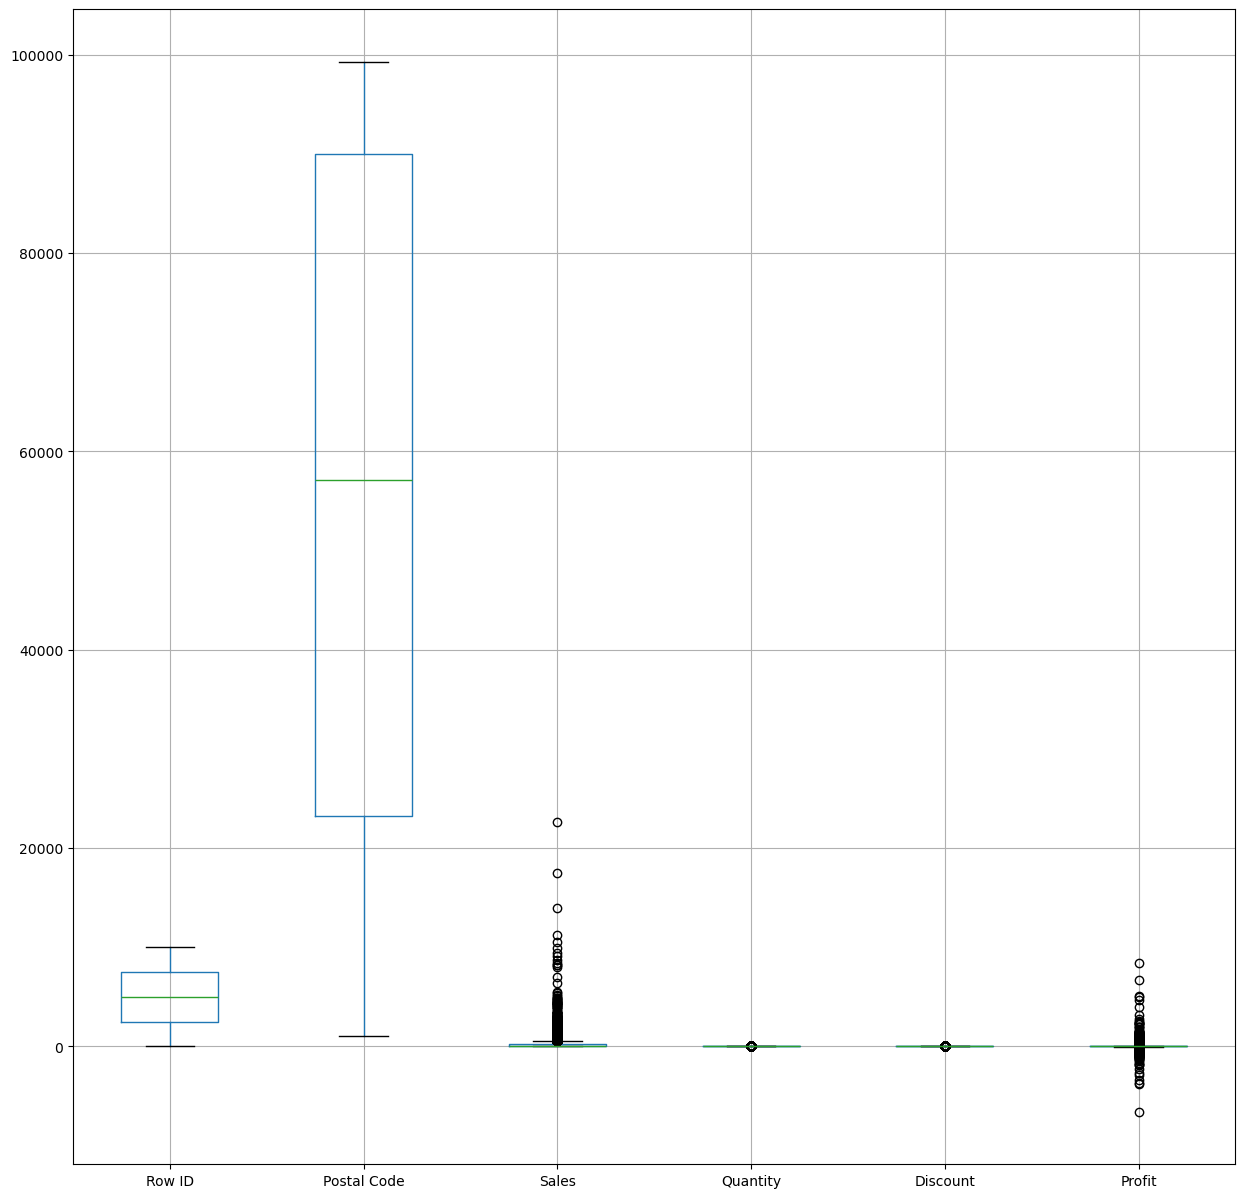

In [13]:
## Cchecking for any outliers
plt.figure(figsize = (15,15))
df.boxplot()
plt.grid(True)
plt.show()

In [11]:
## Dealing with outliers in the inventory column

q1 = df["Sales"].quantile(0.25)
q3 = df["Sales"].quantile(0.75)

iqr = q3 - q1 

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df.loc[(df["Sales"] > upper_limit) | (df["Sales"] < lower_limit)] # identifying the outliers

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
7,8,CA-2018-115812,09/06/2020 00:00:00,14/06/2018,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
10,11,CA-2018-115812,09/06/2020 00:00:00,14/06/2018,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
11,12,CA-2018-115812,09/06/2020 00:00:00,14/06/2018,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,9932,CA-2019-104948,13/11/2021 00:00:00,17/11/2019,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404.0,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
9942,9943,CA-2018-143371,28/12/2020 00:00:00,03/01/2019,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Anaheim,...,92804.0,West,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.8200,9,0.00,29.9646
9947,9948,CA-2021-121559,01/06/2023 00:00:00,03/06/2021,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,46203.0,Central,FUR-CH-10003746,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800,6,0.00,539.2464
9948,9949,CA-2021-121559,01/06/2023 00:00:00,03/06/2021,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,46203.0,Central,OFF-AP-10002945,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2405.2000,8,0.00,793.7160


In [12]:
df_2 = df.loc[(df["Sales"] > upper_limit) | (df["Sales"] < lower_limit)] ## removing the outliers

print("Before Removing Outliers:", len(df))
print("After Removing Outliers:", len(df_2))
print("Outliers:", len(df) - len(df_2))

Before Removing Outliers: 9994
After Removing Outliers: 1167
Outliers: 8827


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 700x700 with 0 Axes>

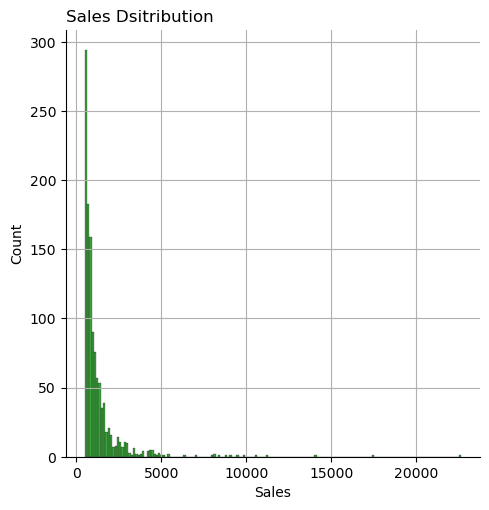

In [22]:
# Step 3: Exploratory Data Analysis
## Sales distribution

plt.figure(figsize = (7,7))
sns.displot(df_2["Sales"], color = "green")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.grid(True)
plt.title("Sales Dsitribution", loc = "left")
plt.show()

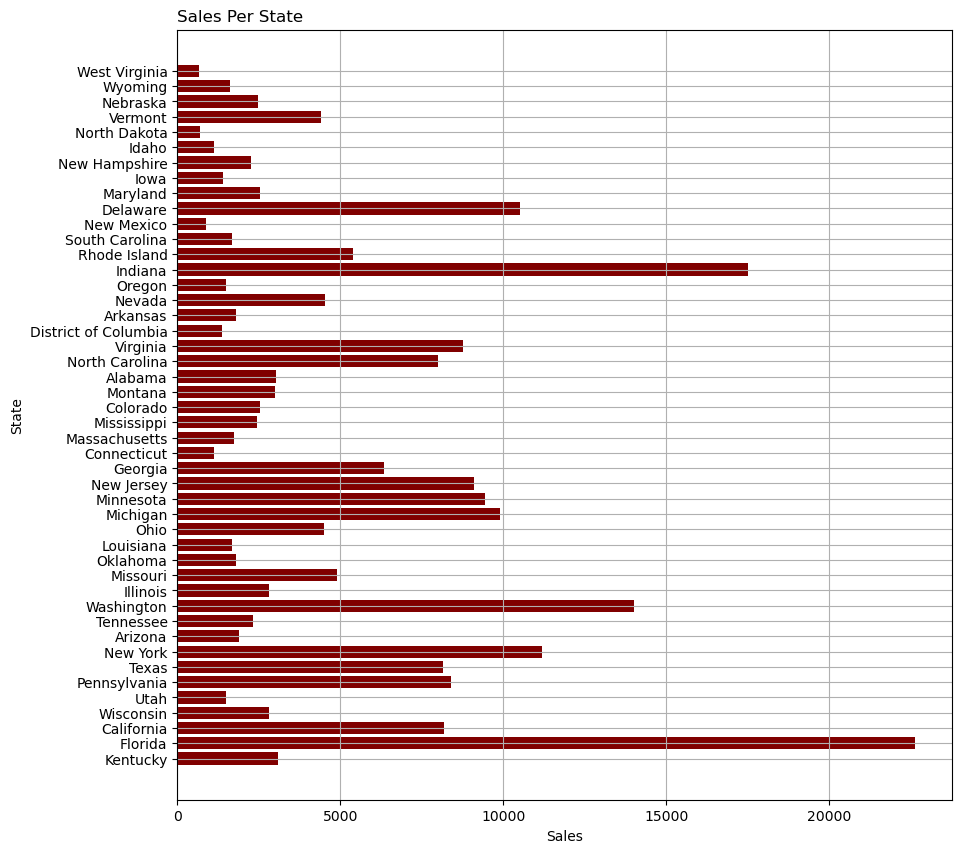

In [13]:
## state with the highest number of sales

plt.figure(figsize = (10,10))
plt.barh(df_2["State"], df_2["Sales"], color = "maroon")
plt.xlabel("Sales")
plt.ylabel("State")
plt.grid(True)
plt.title("Sales Per State", loc = "left")
plt.show()

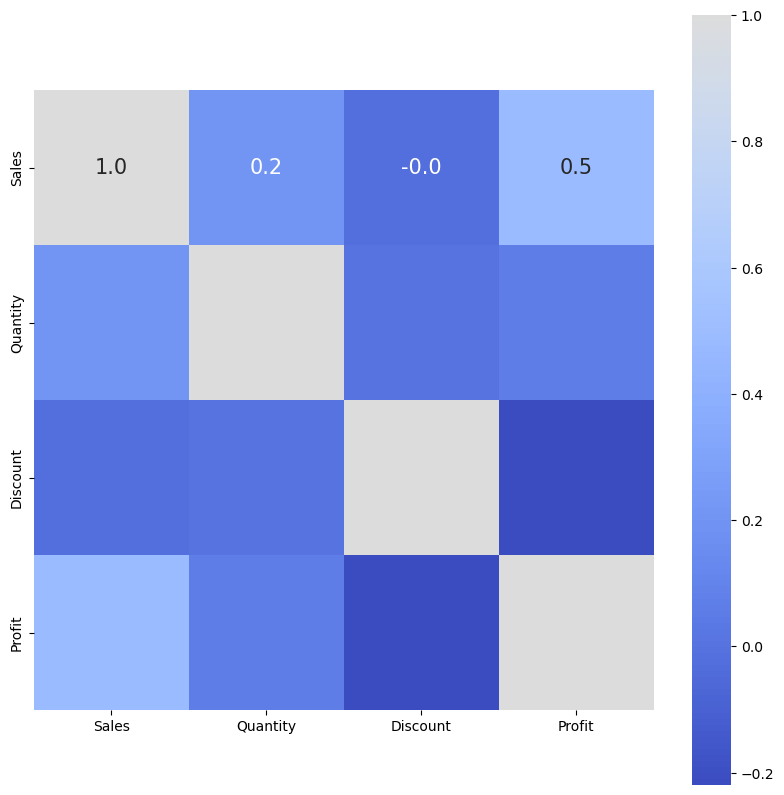

In [24]:
## plotting the correlation of variables

correlation = df1.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, annot=True, annot_kws={"size": 15}, fmt=".1f", square=True, center=True, cmap="coolwarm")
plt.show()

In [14]:
#Step 4: Prediction Models
##Linear Regression
print(df_2.head(6))

    Row ID        Order ID           Order Date   Ship Date       Ship Mode  \
1        2  CA-2020-152156  08/11/2022 00:00:00  11/11/2020    Second Class   
3        4  US-2019-108966  11/10/2021 00:00:00  18/10/2019  Standard Class   
7        8  CA-2018-115812  09/06/2020 00:00:00  14/06/2018  Standard Class   
10      11  CA-2018-115812  09/06/2020 00:00:00  14/06/2018  Standard Class   
11      12  CA-2018-115812  09/06/2020 00:00:00  14/06/2018  Standard Class   
16      17  CA-2018-105893  11/11/2020 00:00:00  18/11/2018  Standard Class   

   Customer ID    Customer Name   Segment Country/Region             City  \
1     CG-12520      Claire Gute  Consumer  United States        Henderson   
3     SO-20335   Sean O'Donnell  Consumer  United States  Fort Lauderdale   
7     BH-11710  Brosina Hoffman  Consumer  United States      Los Angeles   
10    BH-11710  Brosina Hoffman  Consumer  United States      Los Angeles   
11    BH-11710  Brosina Hoffman  Consumer  United States     

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


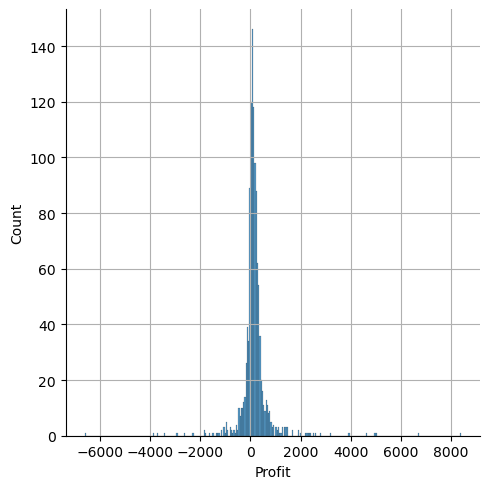

In [15]:
## checking the distribution of the profit column

sns.displot(df_2["Profit"])
plt.grid(True)
plt.show()


In [16]:
describe(df_2["Profit"])

DescribeResult(nobs=1167, minmax=(-6599.978, 8399.976), mean=160.70830771208227, variance=432337.35920044716, skewness=2.338773827524163, kurtosis=50.13057629086735)

In [17]:
# Dropping non-numeric columns from the DataFrame
DF = df.drop(columns=["Row ID", "Order ID", "Order Date", "Ship Date", "Ship Mode",
                       "Customer ID", "Customer Name", "Segment", "Country/Region", 
                       "City", "State", "Postal Code", "Region", "Product ID", 
                       "Category", "Sub-Category", "Product Name"])
print(DF)

         Sales  Quantity  Discount    Profit
0     261.9600         2      0.00   41.9136
1     731.9400         3      0.00  219.5820
2      14.6200         2      0.00    6.8714
3     957.5775         5      0.45 -383.0310
4      22.3680         2      0.20    2.5164
...        ...       ...       ...       ...
9989   25.2480         3      0.20    4.1028
9990   91.9600         2      0.00   15.6332
9991  258.5760         2      0.20   19.3932
9992   29.6000         4      0.00   13.3200
9993  243.1600         2      0.00   72.9480

[9994 rows x 4 columns]


In [18]:
## idefining the d.v and i.v

X = DF.drop(columns = ["Profit"])
y = DF["Profit"]

In [19]:
## dividing the dataset into training and testing sizes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [20]:
## loading the linear regression model

lr = LinearRegression()

In [21]:
## fiting the model with the training data

lr.fit(X_train,y_train)

LinearRegression()

In [22]:
## printing the intercepts

print(lr.intercept_)

42.029552012489766


In [23]:
## printing the coefficients

coefficients = pd.DataFrame(lr.coef_, X_train.columns).T
coefficients = coefficients.rename({0: "Coefficients"})
coefficients

,Sales,Quantity,Discount
Coefficients,0.16959,-4.10596,-245.130013


In [24]:
## predicting the model

pred = lr.predict(X_test)
pred

array([ 34.37388675,  34.70289094,  31.18596882, ...,  38.38826815,
       -15.48183511,  43.17748376])

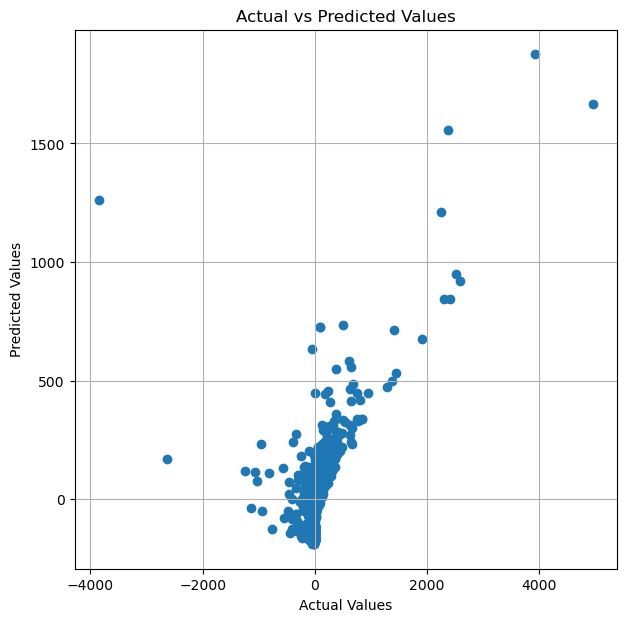

In [25]:
## plotting the results

plt.figure(figsize = (7,7))
plt.scatter(y_test, pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.title("Actual vs Predicted Values")
plt.show()

In [26]:
print("R^2:" , r2_score(y_test, pred))
print("Homogeneity Score:", homogeneity_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, pred)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.3425148005263261
Homogeneity Score: 0.9877265608256731
MAE: 57.88707663850307
MSE: 30853.655801966666
RMSE 175.6520873828907
Adjusted R^2: 2.9724555984210217


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [27]:
### defining the regressor

rc = RandomForestRegressor()

In [28]:
### fitting the model 

rc.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
###predicting the model

pred_rc = rc.predict(X_train)
pred_rc

array([ 3.33998067, 50.023523  , 10.260648  , ...,  6.595266  ,
       55.81774685,  3.76965   ])

In [30]:
## Regressor evaluation scores

print("R^2:" , r2_score(y_train, pred_rc))
print("Homogeneity Score:", homogeneity_score(y_train, pred_rc))
print("MAE:", mean_absolute_error(y_train, pred_rc))
print("MSE:", mean_squared_error(y_train, pred_rc))
print("RMSE", np.sqrt(mean_squared_error(y_train, pred_rc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, pred_rc)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.9394910088492071
Homogeneity Score: 0.9793707884096793
MAE: 10.617120026816819
MSE: 3526.3094042489547
RMSE 59.38273658437235
Adjusted R^2: 1.1815269734523786


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [31]:
## checking if the model is overfitting

y_test_pred_rc = rc.predict(X_test)

In [32]:
print("R^2:" , r2_score(y_test, y_test_pred_rc))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred_rc))
print("MAE:", mean_absolute_error(y_test, y_test_pred_rc))
print("MSE:", mean_squared_error(y_test, y_test_pred_rc))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred_rc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred_rc)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 0.7236964303244118
Homogeneity Score: 0.9845547178350753
MAE: 25.761723751227045
MSE: 12966.03367262058
RMSE 113.8684928881584
Adjusted R^2: 1.8289107090267647


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [33]:
##XGBoost Regressor
###defining the regressor

xgr = XGBRegressor()

In [34]:
## fitting the model

xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
## predicting the model

xgr_pred = xgr.predict(X_train)
xgr_pred

array([ 4.0704703, 71.12269  , 12.354681 , ..., 12.381187 , 55.94501  ,
        3.2560806], dtype=float32)

In [36]:
## Checking for the evaluation metrics

print("R^2:" , r2_score(y_train, xgr_pred))
print("Homogeneity Score:", homogeneity_score(y_train, xgr_pred))
print("MAE:", mean_absolute_error(y_train, xgr_pred))
print("MSE:", mean_squared_error(y_train, xgr_pred))
print("RMSE", np.sqrt(mean_squared_error(y_train, xgr_pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, xgr_pred)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.7863371638933604
Homogeneity Score: 0.8275679292037187
MAE: 18.44440934235367
MSE: 12451.724181348765
RMSE 111.58729399599564
Adjusted R^2: 1.6409885083199187


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [37]:
## checking if the model is overfitting

y_test_pred_xgr = xgr.predict(X_test)

print("R^2:" , r2_score(y_test, y_test_pred_xgr))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred_xgr))
print("MAE:", mean_absolute_error(y_test, y_test_pred_xgr))
print("MSE:", mean_squared_error(y_test, y_test_pred_xgr))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred_xgr)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred_xgr)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 0.5511073193986553
Homogeneity Score: 0.8766822546679078
MAE: 29.64126454475701
MSE: 21065.082940852742
RMSE 145.1381512244549
Adjusted R^2: 2.346678041804034


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [38]:
##SVM Regressor
###defining the standard scalar

sc = StandardScaler()

In [39]:
## defining the training and testing dataset

x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)


In [40]:
## creating an svm regressor

svm_reg = svm.SVR()

In [41]:
## fitting the model

svm_reg.fit(x_train, y_train)

SVR()

In [42]:
## predicting the model

pred_sc = svm_reg.predict(x_train)
pred_sc

array([ 4.95184362, 45.05936764, 11.67817842, ...,  8.66728169,
       41.65241696,  5.48907379])

In [43]:
## Evaluating the model scores

print("R^2:" , r2_score(y_train, pred_sc))
print("Homogeneity Score:", homogeneity_score(y_train, pred_sc))
print("MAE:", mean_absolute_error(y_train, pred_sc))
print("MSE:", mean_squared_error(y_train, pred_sc))
print("RMSE", np.sqrt(mean_squared_error(y_train, pred_sc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, pred_sc)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.06333434499610657
Homogeneity Score: 0.9793707884096793
MAE: 45.019213403436055
MSE: 54586.4811998928
RMSE 233.63749955838168
Adjusted R^2: 3.8099969650116803


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [44]:
y_test_pred_sc = svm_reg.predict(x_test)

print("R^2:" , r2_score(y_test, y_test_pred_sc))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred_sc))
print("MAE:", mean_absolute_error(y_test, y_test_pred_sc))
print("MSE:", mean_squared_error(y_test, y_test_pred_sc))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred_sc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred_sc)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 0.07035237338597011
Homogeneity Score: 0.9877265608256731
MAE: 44.0820675641024
MSE: 43625.35903717022
RMSE 208.86684523200475
Adjusted R^2: 3.7889428798420894


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
